<a href="https://colab.research.google.com/github/ShawnYu111/CV/blob/main/Magnitude_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing required libraries
!pip install tensorflow==1.13.1
#!pip install keras==2.2.4
!pip install innvestigate
!pip install matplotlib
!pip install 'h5py==2.10.0' --force-reinstall

In [ ]:
# Import required packages
import numpy as np # Version 1.16.0
import tensorflow as tf  # Version 1.12.0
import pandas as pd
import keras # Version 2.2.4
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import re
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

tensorflow version: 1.13.1
keras version: 2.2.4


In [ ]:
#Cu
# Load in raw count data for neural network
X_train = pd.read_csv("/content/drive/MyDrive/Train/Cu/X_train_Cu_magnitude.csv")

# Load in ground truth production rate data
y_train = pd.read_csv("/content/drive/MyDrive/Train/Cu/y_train_ppb_Cu.csv")

#load test magnitude set data
X_test = pd.read_csv("/content/drive/MyDrive/Test/Cu/X_test_Cu_magnitude.csv")

#loaf test ppb test data
y_test = pd.read_csv("/content/drive/MyDrive/Test/Cu/y_test_ppb_Cu.csv")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 2500)
(9000, 1)
(1200, 2500)
(1200, 1)


In [ ]:
#Pb
# Load in raw count data for neural network
X_train = pd.read_csv("/content/drive/MyDrive/Train/Pb/X_train_Pb_magnitude.csv")

# Load in ground truth production rate data
y_train = pd.read_csv("/content/drive/MyDrive/Train/Pb/y_train_ppb_Pb.csv")

#load test magnitude set data
X_test = pd.read_csv("/content/drive/MyDrive/Test/Pb/X_test_Pb_magnitude.csv")

#loaf test ppb test data
y_test = pd.read_csv("/content/drive/MyDrive/Test/Pb/y_test_ppb_Pb.csv")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 2500)
(9000, 1)
(1200, 2500)
(1200, 1)


In [ ]:
#Under 6GHz_Cu_magnitude
# Load in raw count data for neural network
X_train = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Cu_magnitude/X_train.csv")

# Load in ground truth production rate data
y_train = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Cu_magnitude/y_train.csv")

#load test magnitude set data
X_test = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Cu_magnitude/X_test.csv")

#loaf test ppb test data
y_test = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Cu_magnitude/y_test.csv")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 1867)
(9000, 1)
(1200, 1867)
(1200, 1)


In [ ]:
#Under 6GHz_Pb_magnitude
# Load in raw count data for neural network
X_train = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Pb_magnitude/X_train.csv")

# Load in ground truth production rate data
y_train = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Pb_magnitude/y_train.csv")

#load test magnitude set data
X_test = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Pb_magnitude/X_test.csv")

#loaf test ppb test data
y_test = pd.read_csv("/content/drive/MyDrive/Under_6GHz_Pb_magnitude/y_test.csv")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 1867)
(9000, 1)
(1200, 1867)
(1200, 1)


In [ ]:
############################################################################

In [ ]:
# create ANN model
model = keras.models.Sequential()

# Defining the Input layer and hidden layer
model.add(keras.layers.Dense(units=512, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(units=256, kernel_initializer='normal', activation='relu'))
#model.add(keras.layers.Dropout(0.25))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(keras.layers.Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train ,batch_size=32, epochs=120, verbose=1)

In [ ]:
# create CNN model
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))

model.add(keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))

model.add(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1, activation="relu"))
model.compile(loss="mse", optimizer= keras.optimizers.Adam(lr=0.001))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Fitting the CNN to the Training set
history = model.fit(np.expand_dims(X_train.values, axis=2), y_train, batch_size=32,epochs=20, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
9000/9000 [==============================] - 42s 5ms/step - loss: 14.2498
Epoch 2/20
9000/9000 [==============================] - 42s 5ms/step - loss: 13.7893
Epoch 3/20
9000/9000 [==============================] - 42s 5ms/step - loss: 13.6869
Epoch 4/20
9000/9000 [==============================] - 42s 5ms/step - loss: 13.2615
Epoch 5/20
9000/9000 [==============================] - 41s 5ms/step - loss: 5.6071
Epoch 6/20
9000/9000 [==============================] - 46s 5ms/step - loss: 0.5081
Epoch 7/20
9000/9000 [==============================] - 45s 5ms/step - loss: 0.3522
Epoch 8/20
9000/9000 [==============================] - 43s 5ms/step - loss: 0.2980
Epoch 9/20
9000/9000 [==============================] - 42s 5ms/step - loss: 0.2542
Epoch 10/20
9000/9000 [==============================] - 42s 5ms/step - loss: 0.2237
Epoch 11/20
9000/9000 [==============================] - 42s 5ms/step - loss: 0.2133
Epoch 12/20
9000/9000 

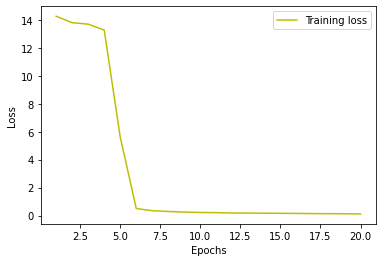

In [ ]:
# relationship between epochs and loss

loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,'y',label = 'Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Generate R square

from sklearn.metrics import r2_score

r2_score(y_test,model.predict(np.expand_dims(X_test.values, axis=2)))
#r2_score(y_test,model.predict(X_test))

0.9973636129669308

In [ ]:
#Save model
model.save("my_model.h5")

In [ ]:
#Read model
model = keras.models.load_model("Pb_magnitude_model.h5")

In [ ]:
###############################################################################################

In [ ]:
#Cu LRP
import innvestigate

analyzer = innvestigate.create_analyzer("lrp.z", model)

In [ ]:
#import the name of files as a list
from glob import glob
files = glob(r'/content/drive/MyDrive/Feature_selection/Test_set/Pb_water/Pb/*.s1p')
files.sort()
print(len(files))

#export each tesing datapoint's LRP
for i in range(0,len(X_test)):
  a = X_test[i:i+1]
  scores = analyzer.analyze(np.expand_dims(a.values, axis=2))[...,0]
  lrp = pd.DataFrame(scores.mean(axis=0), index=a.columns, columns=["Score"])
  # Sort scores by absolute value
  lrp["Abs Score"] = np.abs(lrp["Score"])
  lrp.sort_values(by="Abs Score", ascending=False, inplace=True)
  lrp.to_csv("/content/drive/MyDrive/Pb_magnitude_LRP/" + re.findall("\d+",files[i])[0] + "_" + re.findall("(Cu|Pb)",files[i])[2] + "_" + re.findall("\d+",files[i])[1] + "ppb_" + re.findall("\d+",files[i])[2] + ".csv", index=True)

1200


In [ ]:
#split to 3 different ppb's dataset
data_ppb_1 = []
data_ppb_1 = pd.DataFrame(data_ppb_1)
X_test = pd.DataFrame(X_test)
data_ppb_5 = []
data_ppb_5 = pd.DataFrame(data_ppb_5)
data_ppb_10 = []
data_ppb_10 = pd.DataFrame(data_ppb_10)


for i in range(len(y_test)):
  if y_test['ppb'].loc[i] == 1:
    data_ppb_1 = data_ppb_1.append(pd.DataFrame(X_test[i:i+1]), ignore_index=True)
  if y_test['ppb'].loc[i] == 5:
    data_ppb_5 = data_ppb_5.append(pd.DataFrame(X_test[i:i+1]), ignore_index=True)
  if y_test['ppb'].loc[i] == 10:
    data_ppb_10 = data_ppb_10.append(pd.DataFrame(X_test[i:i+1]), ignore_index=True)


data_ppb_1.reset_index(drop=True,inplace=True)
data_ppb_5.reset_index(drop=True,inplace=True)
data_ppb_10.reset_index(drop=True,inplace=True)



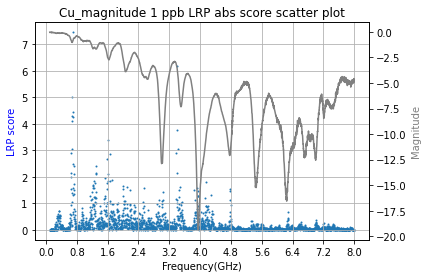

In [ ]:
from matplotlib.pyplot import MultipleLocator
scores = analyzer.analyze(np.expand_dims(data_ppb_1.values, axis=2))[...,0]
lrp = pd.DataFrame(scores.mean(axis=0), index=data_ppb_1.columns, columns=["Score"])
lrp["Abs Score"] = np.abs(lrp["Score"])


rawdata = pd.read_csv('/content/drive/MyDrive/Feature_selection/Train_set/Cu_water/Cu/10_Cu_1ppb_10040.s1p', skiprows=5, delimiter="\t", header=None)
lrp.loc[:, 'Frequency'] = 0
lrp.loc[:, 'Magnitude'] = 0

for i in range(len(lrp)):
  lrp.iloc[i,2] = rawdata.loc[i*8,0]/1000000000
  lrp.iloc[i,3] = rawdata.loc[i*8,1]


x_major_locator = MultipleLocator(0.8)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.scatter(lrp['Frequency'],lrp['Abs Score'], s=1)
ax2 = ax.twinx()
ax2.plot(lrp['Frequency'],lrp['Magnitude'],color = 'grey')
plt.title('Cu_magnitude 1 ppb LRP abs score scatter plot')
ax.set_xlabel('Frequency(GHz)')
ax.set_ylabel('LRP score',color = 'b')
ax2.set_ylabel('Magnitude',color = 'grey')
ax.grid()
plt.savefig('plot.eps', format='eps')
plt.show()

lrp.sort_values(by="Abs Score", ascending=False, inplace=True)
lrp.to_csv("1ppb_lrp.csv", index=True)


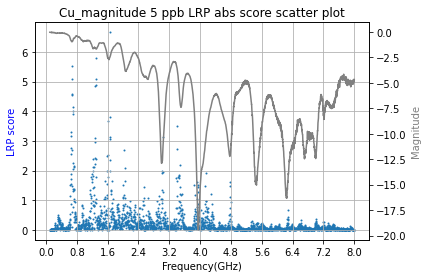

In [ ]:
from matplotlib.pyplot import MultipleLocator
scores = analyzer.analyze(np.expand_dims(data_ppb_5.values, axis=2))[...,0]
lrp = pd.DataFrame(scores.mean(axis=0), index=data_ppb_5.columns, columns=["Score"])
lrp["Abs Score"] = np.abs(lrp["Score"])


rawdata = pd.read_csv('/content/drive/MyDrive/Feature_selection/Train_set/Cu_water/Cu/10_Cu_5ppb_10028.s1p', skiprows=5, delimiter="\t", header=None)
lrp.loc[:, 'Frequency'] = 0
lrp.loc[:, 'Magnitude'] = 0

for i in range(len(lrp)):
  lrp.iloc[i,2] = rawdata.loc[i*8,0]/1000000000
  lrp.iloc[i,3] = rawdata.loc[i*8,1]


x_major_locator = MultipleLocator(0.8)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.scatter(lrp['Frequency'],lrp['Abs Score'], s=1)
ax2 = ax.twinx()
ax2.plot(lrp['Frequency'],lrp['Magnitude'],color = 'grey')
plt.title('Cu_magnitude 5 ppb LRP abs score scatter plot')
ax.set_xlabel('Frequency(GHz)')
ax.set_ylabel('LRP score',color = 'b')
ax2.set_ylabel('Magnitude',color = 'grey')
ax.grid()
plt.savefig('plot.eps', format='eps')
plt.show()

lrp.sort_values(by="Abs Score", ascending=False, inplace=True)
lrp.to_csv("5ppb_lrp.csv", index=True)

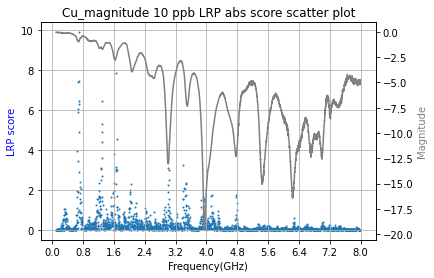

In [ ]:
from matplotlib.pyplot import MultipleLocator
scores = analyzer.analyze(np.expand_dims(data_ppb_10.values, axis=2))[...,0]
lrp = pd.DataFrame(scores.mean(axis=0), index=data_ppb_10.columns, columns=["Score"])
lrp["Abs Score"] = np.abs(lrp["Score"])


rawdata = pd.read_csv('/content/drive/MyDrive/Feature_selection/Train_set/Cu_water/Cu/10_Cu_10ppb_10163.s1p', skiprows=5, delimiter="\t", header=None)
lrp.loc[:, 'Frequency'] = 0
lrp.loc[:, 'Magnitude'] = 0

for i in range(len(lrp)):
  lrp.iloc[i,2] = rawdata.loc[i*8,0]/1000000000
  lrp.iloc[i,3] = rawdata.loc[i*8,1]


x_major_locator = MultipleLocator(0.8)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.scatter(lrp['Frequency'],lrp['Abs Score'], s=1)
ax2 = ax.twinx()
ax2.plot(lrp['Frequency'],lrp['Magnitude'],color = 'grey')
plt.title('Cu_magnitude 10 ppb LRP abs score scatter plot')
ax.set_xlabel('Frequency(GHz)')
ax.set_ylabel('LRP score',color = 'b')
ax2.set_ylabel('Magnitude',color = 'grey')
ax.grid()
plt.savefig('plot.eps', format='eps')
plt.show()

lrp.sort_values(by="Abs Score", ascending=False, inplace=True)
lrp.to_csv("10ppb_lrp.csv", index=True)

In [ ]:
#################################################################################

In [ ]:
#Pb LRP
import innvestigate

analyzer = innvestigate.create_analyzer("lrp.z", model)

In [ ]:
#split to 3 different ppb's dataset
data_ppb_1 = []
data_ppb_1 = pd.DataFrame(data_ppb_1)
X_test = pd.DataFrame(X_test)
data_ppb_5 = []
data_ppb_5 = pd.DataFrame(data_ppb_5)
data_ppb_10 = []
data_ppb_10 = pd.DataFrame(data_ppb_10)


for i in range(len(y_test)):
  if y_test['ppb'].loc[i] == 1:
    data_ppb_1 = data_ppb_1.append(pd.DataFrame(X_test[i:i+1]), ignore_index=True)
  if y_test['ppb'].loc[i] == 5:
    data_ppb_5 = data_ppb_5.append(pd.DataFrame(X_test[i:i+1]), ignore_index=True)
  if y_test['ppb'].loc[i] == 10:
    data_ppb_10 = data_ppb_10.append(pd.DataFrame(X_test[i:i+1]), ignore_index=True)


data_ppb_1.reset_index(drop=True,inplace=True)
data_ppb_5.reset_index(drop=True,inplace=True)
data_ppb_10.reset_index(drop=True,inplace=True)



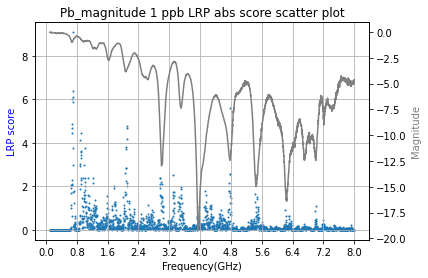

In [ ]:
from matplotlib.pyplot import MultipleLocator
scores = analyzer.analyze(np.expand_dims(data_ppb_1.values, axis=2))[...,0]
lrp = pd.DataFrame(scores.mean(axis=0), index=data_ppb_1.columns, columns=["Score"])
lrp["Abs Score"] = np.abs(lrp["Score"])


rawdata = pd.read_csv('/content/drive/MyDrive/Feature_selection/Train_set/Pb_water/Pb/10_Pb_1ppb_10110.s1p', skiprows=5, delimiter="\t", header=None)
lrp.loc[:, 'Frequency'] = 0
lrp.loc[:, 'Magnitude'] = 0

for i in range(len(lrp)):
  lrp.iloc[i,2] = rawdata.loc[i*8,0]/1000000000
  lrp.iloc[i,3] = rawdata.loc[i*8,1]


x_major_locator = MultipleLocator(0.8)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.scatter(lrp['Frequency'],lrp['Abs Score'], s=1)
ax2 = ax.twinx()
ax2.plot(lrp['Frequency'],lrp['Magnitude'],color = 'grey')
plt.title('Pb_magnitude 1 ppb LRP abs score scatter plot')
ax.set_xlabel('Frequency(GHz)')
ax.set_ylabel('LRP score',color = 'b')
ax2.set_ylabel('Magnitude',color = 'grey')
ax.grid()
plt.savefig('plot.eps', format='eps')
plt.show()

lrp.sort_values(by="Abs Score", ascending=False, inplace=True)
lrp.to_csv("1ppb_lrp.csv", index=True)

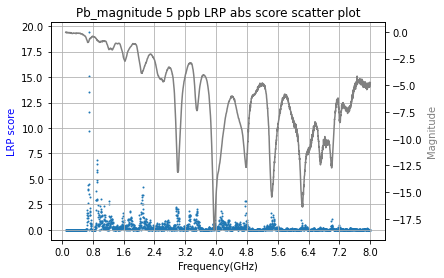

In [ ]:
from matplotlib.pyplot import MultipleLocator
scores = analyzer.analyze(np.expand_dims(data_ppb_5.values, axis=2))[...,0]
lrp = pd.DataFrame(scores.mean(axis=0), index=data_ppb_5.columns, columns=["Score"])
lrp["Abs Score"] = np.abs(lrp["Score"])


rawdata = pd.read_csv('/content/drive/MyDrive/Feature_selection/Train_set/Pb_water/Pb/10_Pb_5ppb_10048.s1p', skiprows=5, delimiter="\t", header=None)
lrp.loc[:, 'Frequency'] = 0
lrp.loc[:, 'Magnitude'] = 0

for i in range(len(lrp)):
  lrp.iloc[i,2] = rawdata.loc[i*8,0]/1000000000
  lrp.iloc[i,3] = rawdata.loc[i*8,1]


x_major_locator = MultipleLocator(0.8)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.scatter(lrp['Frequency'],lrp['Abs Score'], s=1)
ax2 = ax.twinx()
ax2.plot(lrp['Frequency'],lrp['Magnitude'],color = 'grey')
plt.title('Pb_magnitude 5 ppb LRP abs score scatter plot')
ax.set_xlabel('Frequency(GHz)')
ax.set_ylabel('LRP score',color = 'b')
ax2.set_ylabel('Magnitude',color = 'grey')
ax.grid()
plt.savefig('plot.eps', format='eps')
plt.show()

lrp.sort_values(by="Abs Score", ascending=False, inplace=True)
lrp.to_csv("5ppb_lrp.csv", index=True)

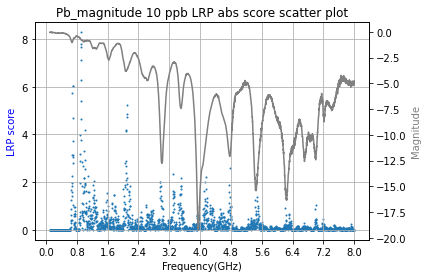

In [ ]:
from matplotlib.pyplot import MultipleLocator
scores = analyzer.analyze(np.expand_dims(data_ppb_10.values, axis=2))[...,0]
lrp = pd.DataFrame(scores.mean(axis=0), index=data_ppb_10.columns, columns=["Score"])
lrp["Abs Score"] = np.abs(lrp["Score"])


rawdata = pd.read_csv('/content/drive/MyDrive/Feature_selection/Train_set/Pb_water/Pb/11_Pb_10ppb_11039.s1p', skiprows=5, delimiter="\t", header=None)
lrp.loc[:, 'Frequency'] = 0
lrp.loc[:, 'Magnitude'] = 0

for i in range(len(lrp)):
  lrp.iloc[i,2] = rawdata.loc[i*8,0]/1000000000
  lrp.iloc[i,3] = rawdata.loc[i*8,1]


x_major_locator = MultipleLocator(0.8)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.scatter(lrp['Frequency'],lrp['Abs Score'], s=1)
ax2 = ax.twinx()
ax2.plot(lrp['Frequency'],lrp['Magnitude'],color = 'grey')
plt.title('Pb_magnitude 10 ppb LRP abs score scatter plot')
ax.set_xlabel('Frequency(GHz)')
ax.set_ylabel('LRP score',color = 'b')
ax2.set_ylabel('Magnitude',color = 'grey')
ax.grid()
plt.savefig('plot.eps', format='eps')
plt.show()

lrp.sort_values(by="Abs Score", ascending=False, inplace=True)
lrp.to_csv("10ppb_lrp.csv", index=True)

In [ ]:
##############################################################################################################

MSE: 0.0357


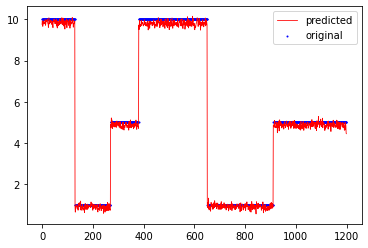

In [ ]:
# Compute MSE and evaluate the model, and visualize the result in a plot.

ypred = model.predict(np.expand_dims(X_test.values, axis=2))
#print(model.evaluate(X_train, y_train))
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=1, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

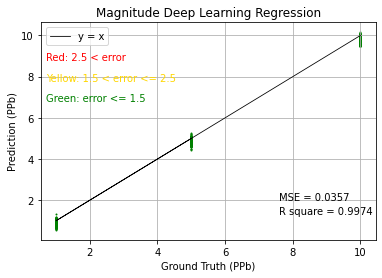

In [ ]:
# virthalize the plot
for i in range (len(y_test)):
  if (abs(ypred[i] - y_test.values[i])) <= 1.5:
    color = "green"
  if (abs(ypred[i] - y_test.values[i])) > 1.5 and ((ypred[i] - y_test.values[i])) <= 2.5:
    color = "gold"
  if (abs(ypred[i] - y_test.values[i])) > 2.5:
    color = "red"
  plt.scatter(y_test.values[i], ypred[i], s=1, c=color)

plt.plot(y_test, y_test, lw=0.8, color="black", label="y = x")
plt.text(0.7,8.8,'Red: 2.5 < error',color = 'red')
plt.text(0.7,7.8,'Yellow: 1.5 < error <= 2.5',color = 'gold')
plt.text(0.7,6.8,'Green: error <= 1.5',color = 'green')
plt.text(7.6,2,'MSE = %.4f' % mean_squared_error(y_test, ypred))
plt.text(7.6,1.3,'R square = %.4f' % r2_score(y_test,model.predict(np.expand_dims(X_test.values, axis=2))))
plt.title('Magnitude Deep Learning Regression')
plt.xlabel('Ground Truth (PPb)')
plt.ylabel('Prediction (PPb)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Output the prediction and ground truth

prediction = pd.DataFrame(ypred, index=None, columns=['Prediction'])
prediction['Ground_truth'] = y_test
prediction.to_csv('prediction.csv',index=True)

In [ ]:
##############################################################################

In [ ]:
#SVR Gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, cv = 3, verbose = 3)

# fitting the model for grid search
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.106 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.084 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=0.1, gamma=1, kernel=rbf;, score=-2.955 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.480 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.192 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.797 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.040 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.119 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-3.626 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.015 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.157 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-4.018 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.834 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.441 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.698 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.992 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.998 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.988 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.213 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.636 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.040 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.119 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1, gamma=0.0001, kernel=rbf;, score=-3.624 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.893 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.825 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.792 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.992 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.998 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.988 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.510 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.215 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.620 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.893 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.825 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.792 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.993 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.994 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.992 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.998 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.988 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .......C=1000, gamma=1, kernel=rbf;, score=0.893 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1000, gamma=1, kernel=rbf;, score=0.825 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1000, gamma=1, kernel=rbf;, score=0.792 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.993 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.994 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.993 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.998 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.994 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.001)


In [ ]:
#SVR using best parameters
from sklearn.svm import SVR

regressor = SVR(kernel='rbf', C=100, gamma=0.0001)
regressor.fit(X_train,y_train)
#y_pred_svr = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.0001)

0.9993488073767094


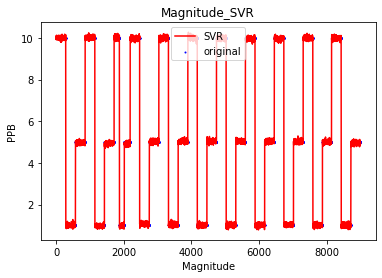

In [ ]:
#Generate plot and R2
from sklearn.metrics import r2_score

print(r2_score(y_test,regressor.predict(X_test)))

plt.scatter(range(len(X_train)), y_train, s = 1, color = 'blue',label='original')
plt.plot(range(len(X_train)), regressor.predict(X_train), color = 'red',label='SVR')
plt.title('Magnitude_SVR')
plt.xlabel('Magnitude')
plt.ylabel('PPB')
plt.legend()
plt.show()

In [ ]:
s = "anagram"
t = "nagaram"
sorted(s)
Counter(s)

NameError: ignored